In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
baseDP = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep=';', encoding='latin1')
baseDP 

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,47,2,1,0,0,0,637,3
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,26,2,1,0,0,0,473,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36624,159,8,2025,2025m08,35,4,Cachoeiras de Macacu,3300803,Interior,1,...,5.0,0.0,16,0,0,0,0,0,148,2
36625,165,8,2025,2025m08,33,5,Mangaratiba,3302601,Interior,0,...,5.0,0.0,21,2,0,0,0,0,179,2
36626,166,8,2025,2025m08,33,5,Angra dos Reis,3300100,Interior,3,...,11.0,3.0,63,8,0,0,0,0,595,2
36627,167,8,2025,2025m08,43,5,Paraty,3303807,Interior,0,...,3.0,0.0,13,2,0,1,0,0,234,2


In [67]:
baseDP['total_furtosRoubos'] = baseDP['roubo_veiculo'] + baseDP['furto_veiculos']
baseDP.head(60)
baseDP_ordenada = baseDP.sort_values(by='total', ascending=False)
baseDP_ordenada.head(20)


,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase,total,total_fr,total_furtosRoubos
24336,54,3,2018,2018m03,39,3,Belford Roxo,3300456,Baixada Fluminense,21,...,14,1,0,1,0,1659,3,409,409,409
24324,39,3,2018,2018m03,41,2,Rio de Janeiro,3304557,Capital,11,...,9,0,0,1,0,1501,3,400,400,400
23242,64,7,2017,2017m07,21,3,São João de Meriti,3305109,Baixada Fluminense,11,...,11,1,0,0,0,1816,3,376,376,376
22690,64,3,2017,2017m03,21,3,São João de Meriti,3305109,Baixada Fluminense,16,...,13,0,0,0,0,1102,3,364,364,364
24070,64,1,2018,2018m01,21,3,São João de Meriti,3305109,Baixada Fluminense,18,...,11,0,0,0,0,1789,3,358,358,358
24346,64,3,2018,2018m03,21,3,São João de Meriti,3305109,Baixada Fluminense,22,...,5,0,0,0,0,1693,3,356,356,356
22000,64,10,2016,2016m10,21,3,São João de Meriti,3305109,Baixada Fluminense,25,...,16,0,0,0,0,2139,3,345,345,345
22138,64,11,2016,2016m11,21,3,São João de Meriti,3305109,Baixada Fluminense,9,...,15,0,0,0,0,1894,3,343,343,343
23380,64,8,2017,2017m08,21,3,São João de Meriti,3305109,Baixada Fluminense,8,...,7,0,0,0,0,1893,3,341,341,341
27222,54,12,2019,2019m12,39,3,Belford Roxo,3300456,Baixada Fluminense,10,...,10,1,0,0,0,1335,3,337,337,337


In [68]:
roubo_furto = baseDP.groupby('cisp')['total_furtosRoubos'].sum().reset_index()
roubo_furtoOrdenado = roubo_furto.sort_values(by='total_furtosRoubos', ascending=False)
roubo_furtoOrdenado


,cisp,total_furtosRoubos
52,59,51000
57,64,42940
23,27,38772
30,34,36770
31,35,33178
...,...,...
41,45,78
131,157,67
129,155,62
114,138,23


In [50]:
baseDP_roubofurto = np.array(baseDP['furto_veiculos'])
mediana_veiculos = np.median(baseDP_roubofurto)
media_veiculos = np.mean(baseDP_roubofurto).round(1)  
q1 = np.percentile(baseDP_roubofurto, 25)
q2 = np.percentile(baseDP_roubofurto, 50)
q3 = np.percentile(baseDP_roubofurto, 75)
print((f'media de furtos e furtos: {media_veiculos}'))
print((f'primeiro quartil: {q1}'))
print((f'mediana: {mediana_veiculos}'))
print((f'mediana (segundo quartil): {q2}'))
print((f'terceiro quartil: {q3}'))
distancia = (media_veiculos - mediana_veiculos) / mediana_veiculos
print((f'distancia entre media e mediana: {distancia * 100:.2f}%'))
IQR = q3 - q1 
limite_inferior = q1 - (1.5 * IQR)
limite_superior = q3 + (1.5 * IQR)

media de furtos e furtos: 11.0
primeiro quartil: 1.0
mediana: 6.0
mediana (segundo quartil): 6.0
terceiro quartil: 16.0
distancia entre media e mediana: 83.33%


In [87]:
roubo_furto_filtrado = roubo_furto.loc[(roubo_furto['total_furtosRoubos'] >= limite_inferior)]
roubo_furto_filtrado
roubo_furto_filtrado.sort_values(by='total_furtosRoubos', ascending=False)

,cisp,total_furtosRoubos
52,59,51000
57,64,42940
23,27,38772
30,34,36770
31,35,33178
...,...,...
41,45,78
131,157,67
129,155,62
114,138,23


In [86]:
roubo_furto_filtrado = roubo_furto.loc[(roubo_furto['total_furtosRoubos'] <= limite_superior)]
roubo_furto_filtrado.sort_values(by='total_furtosRoubos', ascending=False)

,cisp,total_furtosRoubos
114,138,23
77,92,22


In [ ]:
baseDP_media = np.array(baseDP_veiculos['furto_veiculos'])
mediana_veiculos = np.median(baseDP_media)
media_veiculos = np.mean(baseDP_media).round(1)  
q1 = np.percentile(baseDP_media, 25)
q2 = np.percentile(baseDP_media, 50)
q3 = np.percentile(baseDP_media, 75)
print((f'media de furtos: {media_veiculos}'))
print((f'primeiro quartil: {q1}'))
print((f'mediana: {mediana_veiculos}'))
print((f'mediana (segundo quartil): {q2}'))
print((f'terceiro quartil: {q3}'))
distancia = (media_veiculos - mediana_veiculos) / mediana_veiculos
print((f'distancia entre media e mediana: {distancia * 100:.2f}%'))
IQR = q3 - q1 
limite_inferior = q1 - (1.5 * IQR)
limite_superior = q3 + (1.5 * IQR)

media de furtos: 1502.1
primeiro quartil: 71.75
mediana: 145.5
mediana (segundo quartil): 145.5
terceiro quartil: 2026.0
distancia entre media e mediana: 932.37%


In [ ]:
baseDP_furto_celular = baseDP['furto_celular']
baseDP_furto_celular.head(30)


0     37
1     23
2     47
3      8
4      1
5     16
6     21
7     29
8     34
9     36
10     8
11    18
12    15
13    10
14    17
15     3
16     9
17     4
18    11
19     4
20     8
21     0
22     2
23     3
24    10
25     4
26     0
27     7
28     4
29     9
Name: furto_celular, dtype: int64

In [6]:
baseDP_delegacias = baseDP.groupby('cisp')['furto_celular'].sum().reset_index()
baseDP_delegacias

,cisp,furto_celular
0,1,14789
1,4,13093
2,5,22494
3,6,6072
4,7,1425
...,...,...
133,159,450
134,165,1216
135,166,2531
136,167,483


In [7]:
baseDP_furto = np.array(baseDP_delegacias['furto_celular'])
mediana_furto = np.median(baseDP_furto)
media_furto = np.mean(baseDP_furto).round(1)  
q_1 = np.percentile(baseDP_furto, 25) ### equivalente ao primeiro quartil, que menos esperaram
q_2 = np.percentile(baseDP_furto, 50)
q_3 = np.percentile(baseDP_furto, 75)
print((f'media de furtos: {media_furto}'))
print((f'primeiro quartil: {q_1}'))
print((f'mediana: {mediana_furto}'))
print((f'mediana (segundo quartil): {q_2}'))
print((f'terceiro quartil: {q_3}'))
distancia = (media_furto - mediana_furto) / mediana_furto
print((f'distancia entre media e mediana: {distancia * 100:.2f}%')) ### a distancia entre media e mediana < 10% : media é uma medida confiavel
### distancia > 10% < 25 : uma medida extrema tá puxando a media para cima
### distancia > 25% : media não é uma medida confiavel, utilizar mediana
### se a media for menor que a mediana: influencia de valores extremos para baixo
### se a media for maior que a mediana: influencia de valores extremos para cima
IQR  = q_3 - q_1
limite_inferior = q_1 - (1.5 * IQR)
limite_superior = q_3 + (1.5 * IQR)

media de furtos: 3281.0
primeiro quartil: 445.5
mediana: 1609.5
mediana (segundo quartil): 1609.5
terceiro quartil: 4377.25
distancia entre media e mediana: 103.85%


In [16]:
baseDP_cel_menor = baseDP_delegacias.loc[baseDP_delegacias['furto_celular'] <= q_1]
baseDP_cel_menor

,cisp,furto_celular
7,11,383
41,45,73
60,67,351
61,70,196
77,92,63
79,94,355
82,97,226
83,98,89
84,99,428
85,100,386


In [11]:
baseDP_cel_maior = baseDP_delegacias.loc[baseDP_delegacias['furto_celular'] >= limite_superior]
baseDP_cel_maior.sort_values(by='furto_celular', ascending=False)

NameError: name 'baseDP_delegacias' is not defined

In [6]:
BaseDP_estelionato = baseDP.groupby('cisp')['estelionato'].sum().reset_index()
BaseDP_estelionato


,cisp,estelionato
0,1,27293
1,4,6918
2,5,21417
3,6,7226
4,7,2182
...,...,...
133,159,1767
134,165,1950
135,166,7979
136,167,2338


In [ ]:

base_est_estelionato = np.array(BaseDP_estelionato['estelionato'])
mediana = np.median(base_est_estelionato)
media = np.mean(base_est_estelionato).round(1)

q1 = np.percentile(base_est_estelionato, 25)
q2 = np.percentile(base_est_estelionato, 50)
q3 = np.percentile(base_est_estelionato, 75)

print((f'media de estelionato: {media}'))
print((f'primeiro quartil: {q1}'))
print((f'mediana: {mediana}'))
print((f'mediana (segundo quartil): {q2}'))
print((f'terceiro quartil: {q3}'))
distancia = (media - mediana) / mediana
print((f'distancia entre media e mediana: {distancia * 100:.2f}%'))

iqr  = q3 - q1
limite_inferior = q1 - (1.5 * iqr)
limite_superior = q3 + (1.5 * iqr)

print((f'limite inferior: {limite_inferior*100:.2f}%'))
print((f'limite superior: {limite_superior*100:.2f}%'))

BaseDP_estelionato_ordenado = BaseDP_estelionato.sort_values(by='estelionato', ascending=False)

BaseDP_estelionato_ordenado['cisp'] = BaseDP_estelionato_ordenado['cisp'].astype(str)

outliers = BaseDP_estelionato_ordenado[BaseDP_estelionato_ordenado['estelionato'] > limite_superior]

outliers.to_csv('outliers_estelionato.csv', index=False, sep=';')
plt.figure(figsize=(15, 10))
plt.bar(outliers['cisp'], outliers['estelionato'], color='red')
plt.title('Estelionatos por CISP (Outliers em Vermelho)')
plt.xlabel('Delegacia (CISP)')
plt.ylabel('Casos de Estelionato')
plt.tight_layout()
plt.show()


media de estelionato: 7757.9
primeiro quartil: 1290.5
mediana: 6075.0
mediana (segundo quartil): 6075.0
terceiro quartil: 11315.75
distancia entre media e mediana: 27.70%
limite inferior: -1374737.50%
limite superior: 2635362.50%


In [27]:
base_est_estelio = np.array(BaseDP_estelionato['estelionato'])
mediana = np.median(base_est_estelio)
media = np.mean(base_est_estelio).round(1) 
q1 = np.percentile(base_est_estelio, 25) ### equivalente ao primeiro quartil, que menos esperaram
q2 = np.percentile(base_est_estelio, 50)
q3 = np.percentile(base_est_estelio, 75)
print((f'media de estelionatos: {media}'))
print((f'primeiro quartil: {q1}'))
print((f'mediana: {mediana}'))
print((f'mediana (segundo quartil): {q2}'))
print((f'terceiro quartil: {q3}'))

distancia = (media - mediana) / mediana
print((f'distancia entre media e mediana: {distancia * 100:.2f}%')) ### a distancia entre media e mediana < 10% : media é uma medida confiavel
### distancia > 10% < 25 : uma medida extrema tá puxando a media para cima
### distancia > 25% : media não é uma medida confiavel, utilizar mediana
### se a media for menor que a mediana: influencia de valores extremos para baixo
### se a media for maior que a mediana: influencia de valores extremos para cima
IQR  = q3 - q1
limite_inferior = q1 - (1.5 * IQR)
limite_superior = q3 + (1.5 * IQR)

outliers = BaseDP_estelionato[
    (BaseDP_estelionato['estelionato'] < limite_inferior) |
    (BaseDP_estelionato['estelionato'] > limite_superior)
]

print("Outliers:")
print(outliers)

media de estelionatos: 7757.9
primeiro quartil: 1290.5
mediana: 6075.0
mediana (segundo quartil): 6075.0
terceiro quartil: 11315.75
distancia entre media e mediana: 27.70%
Outliers:
    cisp  estelionato
0      1        27293
12    16        41003
28    32        32570
31    35        38234


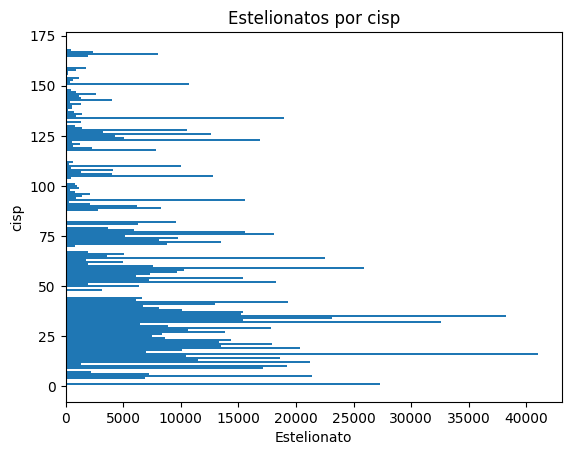

In [29]:

df = {'delegacias': BaseDP_estelionato['cisp'], 'estelionatos': BaseDP_estelionato['estelionato']}


BaseDP_estelionato_ordenado = BaseDP_estelionato.sort_values(by='estelionato', ascending=False)

plt.barh(BaseDP_estelionato_ordenado['cisp'], BaseDP_estelionato_ordenado['estelionato'])
plt.title('Estelionatos por cisp')
plt.xlabel('Estelionato')
plt.ylabel('cisp')
plt.show()


In [19]:
baseEstelionato_menor = BaseDP_estelionato.loc[BaseDP_estelionato['estelionato'] < limite_inferior]
baseEstelionato_menor

,cisp,estelionato


In [81]:
baseEstelionato_maior = BaseDP_estelionato.loc[BaseDP_estelionato['estelionato'] >= q3]
baseEstelionato_maior

,cisp,estelionato
0,1,27293
2,5,21417
5,9,17092
6,10,19249
8,12,21174
9,13,11509
10,14,18586
12,16,41003
15,19,20340
16,20,13490
